In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Q1 In the above dataset :   

### a. In case age is less than 18, replace it with mean of age values.

In [2]:
Customer_Acq = pd.read_csv("./Data/Customer Acqusition.csv")

In [3]:
df = pd.DataFrame(Customer_Acq)
df.loc[df['Age']<18,'Age'] = df.Age.mean()

df.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [4]:
Spend_amt = pd.read_csv('./Data/spend.csv')

In [5]:
#Merging Spend and Customer Acquistion csv files
df1 = pd.merge(left = Customer_Acq,
               right = Spend_amt,
               left_on = 'Customer',
               right_on = 'Customer',
               how = 'inner',
               indicator = True)

Cust_limit = 0.50*df1.Limit
df1.loc[df1['Amount']>df1['Limit'],['Amount','Limit']] = Cust_limit

df1.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,both
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,both
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,both
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,both


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit. 

In [6]:
Repayment = pd.read_csv('./Data/Repayment.csv')

In [7]:
#Merging Repayment and Customer Acquistion csv files
df2 = pd.merge(left = Customer_Acq,
               right = Repayment,
               left_on = 'Customer',
               right_on = 'Customer',
               how = 'inner',
               indicator = True)

df2.drop(df2.columns[11],axis=1)

df2.loc[df2['Amount']>df2['Limit'],['Amount','Limit']] = df2.Limit

df2.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,495414.75,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,245899.02,both
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,259490.06,both
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,437555.12,both
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,165972.88,both


## Q2. From the above dataset create the following summaries:


### a. How many distinct customers exist?

In [8]:
Customer_Acq.Customer.nunique()

100

### b. How many distinct categories exist?

In [9]:
print("Product ",df1.Product.nunique())
print("Segment ",df1.Segment.nunique())
print("Type   ",df1.Type.nunique())

Product  3
Segment  5
Type    15


### c. What is the average monthly spend by customers?

In [10]:
df1['Month'] = pd.to_datetime(df1['Month'])
df1['month'] = df1['Month'].dt.month

avg_month_spend = df1.groupby(["Customer","month"])['Amount'].mean()
display(pd.DataFrame(avg_month_spend))

Amount
Customer month               
A1       1      372762.587143
         2      175235.690000
         4      261649.250000
         5      361141.310000
         8      344372.100000
...                       ...
A95      1      240401.500000
A96      1       54729.660000
A97      1        5000.000000
A98      1        5000.500000
A99      1        5001.000000

[578 rows x 1 columns]

### d. What is the average monthly repayment by customers?

In [11]:
df2['Month'] = pd.to_datetime(df2['Month'])
df2['month'] = df2['Month'].dt.month

avg_month_repay = df2.groupby(["Customer","month"])['Amount'].mean()
display(pd.DataFrame(avg_month_repay))

Amount
Customer month               
A1       1      343972.327143
         2      156374.760000
         4      254474.580000
         7      297176.740000
         9      186427.500000
...                       ...
A95      1      369405.960000
A96      1      100000.000000
A97      1       10000.000000
A98      1       10001.000000
A99      1       10002.000000

[558 rows x 1 columns]

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [12]:
profit = df2.Amount - df1.Amount
df2['profit'] = profit
profit_mon = df2.groupby(["month"])['profit'].sum()

profit_mon

month
1     3018156.34
2     6019844.45
3     1879245.23
4     4546796.37
5     4055837.08
6      259114.30
7     2033936.92
8      696750.47
9      436487.18
10     395570.00
11     943080.18
12     916456.34
Name: profit, dtype: float64

### f. What are the top 5 product types?

In [13]:
Top_5 = Spend_amt.groupby('Type').sum().sort_values("Amount",ascending = False).head(5)
t = (Top_5).reset_index()

display(t)

,Type,Sl No:,Amount
0,PETRO,146920,49863174.09
1,CAMERA,113612,41481571.96
2,FOOD,110164,37773338.43
3,TRAIN TICKET,90087,33067077.15
4,AIR TICKET,117877,32955445.42


### g. Which city is having maximum spend?

In [14]:
group_city = df1.groupby(['City'])['Amount'].sum()
group_city.nlargest(1)

City
COCHIN    45963513.5
Name: Amount, dtype: float64

### h. Which age group is spending more money?

In [15]:
group_age = df1.groupby('Age').sum()
amount_spend =  group_age['Amount']
amount_spend.nlargest(1)

Age
28.0    17365270.23
Name: Amount, dtype: float64

### i. Who are the top 10 customers in terms of repayment?

In [16]:
Top_10 = df2.groupby('Customer').sum().sort_values("Amount",ascending = False).head(10)
t = Top_10
display(t)

,No,Age,Limit,SL No:,Amount,month,profit
Customer,,,,,,,
A61,2318,1672.00,19000000.0,45502,10539142.91,159,1536816.52
A60,2280,1064.00,19000000.0,45464,9876290.74,146,-1144640.24
A13,403,899.00,15500000.0,10148,9572000.66,134,1340393.40
A43,1333,651.00,15500000.0,31424,8489871.46,117,1782083.54
A45,1395,2077.00,15500000.0,31486,8448334.87,119,1458090.77
A12,372,1581.00,15500000.0,10117,8334760.16,123,151709.52
A14,434,1441.19,15500000.0,10179,7943268.63,137,282182.43
A44,1364,868.00,15500000.0,31455,7744730.12,126,1555390.87
A39,1209,2418.00,15500000.0,31300,7622483.30,142,-128024.92


## Q3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

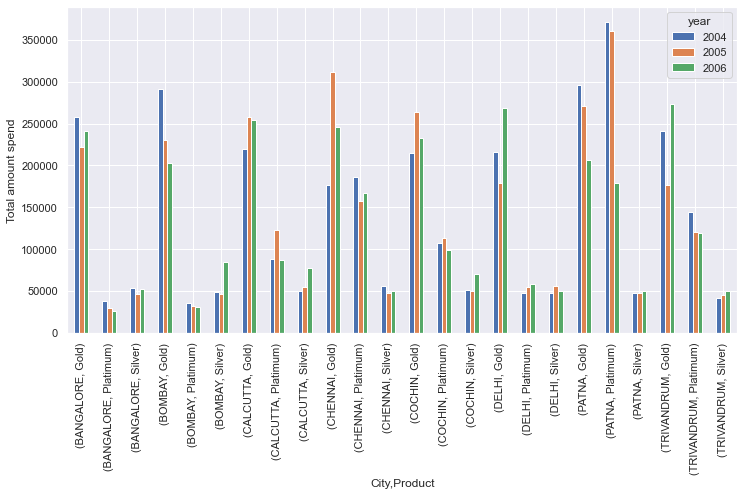

In [17]:
df1['Month'] = pd.to_datetime(df1['Month'])
df1['year'] = df1['Month'].dt.year
g = df1.groupby(["City","Product","year"])            
tot_amount = g[["Amount"]].sum().add_prefix("Total_")
tot_amount


#Graph
sns.set()
pd.pivot_table(df1, index =['City','Product'],columns ='year',values ='Amount').plot.bar(figsize=(12,6))
plt.ylabel('Total amount spend')
plt.show()

## Q4. Create graphs for -

### a. Monthly comparison of total spends, city wise

<ipython-input-18-9fd87411825a>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


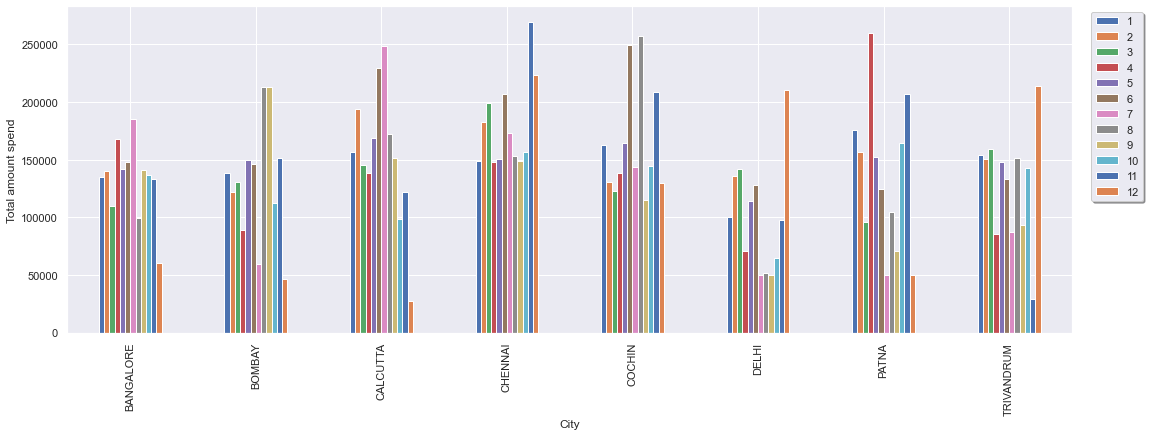

In [18]:
# sns.set()
# pd.pivot_table(df1, index ='Month',columns = 'City',values = 'Amount').plot(kind='bar')
# plt.ylabel("Total amount spend")

df1['Month'] = pd.to_datetime(df1['Month'])
df1['month'] = df1['Month'].dt.month
sns.set()
pd.pivot_table(df1, index ='City',columns ='month',values="Amount").plot(kind='bar',figsize=(18,6))
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.045,1), shadow=True, ncol=1)
plt.ylabel('Total amount spend')
plt.show()

### b. Comparison of yearly spend on air tickets

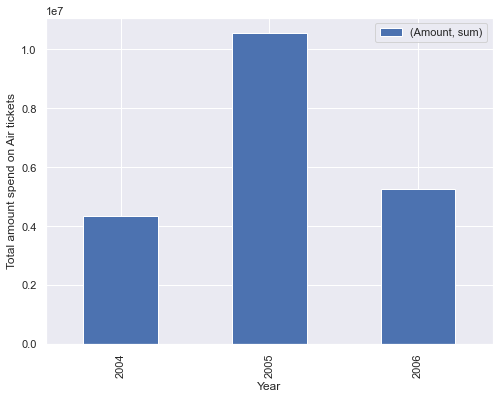

In [19]:
df1['Month'] = pd.to_datetime(df1['Month'])
df1['Year'] = df1['Month'].dt.year

s = df1.loc[(df1.Type == 'AIR TICKET')]
spend = s.groupby(['Year']).aggregate({'Amount':['sum']})

spendgraph=spend.plot.bar(figsize=(8,6))
plt.legend()
plt.ylabel('Total amount spend on Air tickets')
plt.show()

### c. Comparison of monthly spend for each product

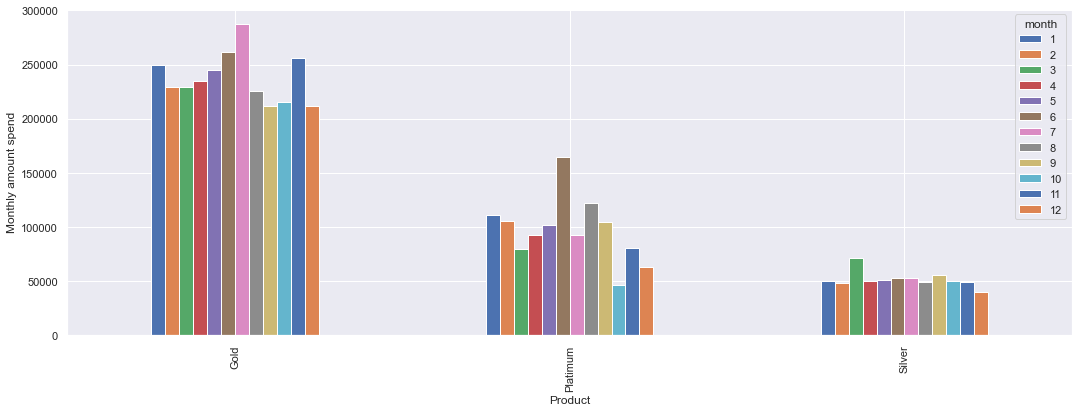

In [20]:
df1['Month'] = pd.to_datetime(df1['Month'])
df1['month'] = df1['Month'].dt.month
g = df1.groupby(["Product","month"])            
tot_amount = g[["Amount"]].sum().add_prefix("Total_")
tot_amount


#Graph
sns.set()
pd.pivot_table(df1, index ='Product',columns ='month',values ='Amount').plot.bar(figsize=(18,6))
plt.ylabel('Monthly amount spend')
plt.show()